In [17]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 4.1. Loading data with linear interpolation.

In [18]:
# Open df with FL characteristics (y)

df = pd.read_csv("FL_augm_inter_w_smooth.csv", index_col = 'idx').iloc[:,1:] #"FL_augm_inter_w.csv"
df

,I,x,y,left_bound,right_bound,down_bound,up_bound,I_x_left,I_x_right,I_y_down,I_y_up,Cu,Ni,Pb,Al,Co,Cr,NO3
idx,,,,,,,,,,,,,,,,,,
1,1094.013,440.0,350.0,410.997078,483.985513,319.837088,377.141444,32092.946811,55681.420983,7526.354879,6554.217700,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,202.294,450.0,350.0,414.577059,498.744699,323.395276,380.964878,6988.960165,10871.964268,1184.090837,1342.087958,0.0,0.0,0.0,0.0,4.5,4.5,22.5
100,177.025,454.0,355.0,417.197886,502.827048,327.105424,383.454723,6662.354552,9932.300708,1123.217310,1146.207041,0.0,0.0,1.5,3.0,6.0,4.5,37.5
1000,191.846,455.0,355.0,418.799921,504.925887,327.328667,383.479384,6944.652646,10680.836195,1170.757224,1225.503524,0.0,4.5,0.0,6.0,6.0,4.5,52.5
1001,631.573,441.0,350.0,411.644120,485.927998,321.419781,377.998183,18644.724966,32540.515302,4147.462148,3894.747976,0.0,4.5,1.5,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,246.346,456.0,355.0,418.914238,505.600813,327.041189,383.432359,9085.038092,13701.728784,1521.052042,1555.695514,0.0,4.5,0.0,6.0,3.0,4.5,46.5
996,399.123,456.0,360.0,422.002086,505.372822,328.436916,390.751460,13991.087131,22430.024973,2782.018995,2715.377589,0.0,4.5,0.0,6.0,4.5,0.0,36.0
997,256.685,454.0,355.0,417.657632,504.495323,326.466136,383.546410,9514.945313,14770.350457,1663.446831,1668.043184,0.0,4.5,0.0,6.0,4.5,3.0,45.0


In [19]:
idx_norm = 1

df_norm = pd.DataFrame()

df_norm['I'] = df['I'] / df['I'].loc[idx_norm]
df_norm['x'] = df['x'] / df['x'].loc[idx_norm]
df_norm['y'] = df['y'] / df['y'].loc[idx_norm]

df_norm['x_hw_mean'] = (df['right_bound'] + df['left_bound']) / (df['right_bound'].loc[idx_norm] + df['left_bound'].loc[idx_norm])
df_norm['x_hw_res'] = (df['right_bound'] - df['left_bound']) / (df['right_bound'].loc[idx_norm] - df['left_bound'].loc[idx_norm])
df_norm['y_hw_mean'] = (df['up_bound'] + df['down_bound']) / (df['up_bound'].loc[idx_norm] + df['down_bound'].loc[idx_norm])
df_norm['y_hw_res'] = (df['up_bound'] - df['down_bound']) / (df['up_bound'].loc[idx_norm] - df['down_bound'].loc[idx_norm])

df_norm['x_I_mean'] = (df['I_x_right'] + df['I_x_left']) / (df['I_x_right'].loc[idx_norm] + df['I_x_left'].loc[idx_norm])
df_norm['x_I_res'] = (df['I_x_right'] - df['I_x_left']) / (df['I_x_right'].loc[idx_norm] - df['I_x_left'].loc[idx_norm])
df_norm['y_I_mean'] = (df['I_y_up'] + df['I_y_down']) / (df['I_y_up'].loc[idx_norm] + df['I_y_down'].loc[idx_norm])
df_norm['y_I_res'] = (df['I_y_up'] - df['I_y_down']) / (df['I_y_up'].loc[idx_norm] - df['I_y_down'].loc[idx_norm])

df_norm['Cu'] = df['Cu']
df_norm['Ni'] = df['Ni']
df_norm['Pb'] = df['Pb']
df_norm['Al'] = df['Al']
df_norm['Co'] = df['Co']
df_norm['Cr'] = df['Cr']
df_norm['NO3'] = df['NO3']

df_norm

,I,x,y,x_hw_mean,x_hw_res,y_hw_mean,y_hw_res,x_I_mean,x_I_res,y_I_mean,y_I_res,Cu,Ni,Pb,Al,Co,Cr,NO3
idx,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.184910,1.022727,1.000000,1.020491,1.153164,1.010591,1.004629,0.203487,0.164614,0.179409,-0.162526,0.0,0.0,0.0,0.0,4.5,4.5,22.5
100,0.161813,1.031818,1.014286,1.027981,1.173188,1.019486,0.983334,0.189060,0.138625,0.161174,-0.023649,0.0,0.0,1.5,3.0,6.0,4.5,37.5
1000,0.175360,1.034091,1.014286,1.032116,1.179995,1.019842,0.979868,0.200805,0.158390,0.170182,-0.056315,0.0,4.5,0.0,6.0,6.0,4.5,52.5
1001,0.577299,1.002273,1.000000,1.002893,1.017749,1.003500,0.987332,0.583146,0.589092,0.571156,0.259957,0.0,4.5,1.5,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.225176,1.036364,1.014286,1.032998,1.187675,1.019362,0.984064,0.259606,0.195718,0.218510,-0.035636,0.0,4.5,0.0,6.0,3.0,4.5,46.5
996,0.364825,1.036364,1.028571,1.036193,1.142246,1.031866,1.087431,0.414940,0.357757,0.390424,0.068551,0.0,4.5,0.0,6.0,4.5,0.0,36.0
997,0.234627,1.031818,1.014286,1.030359,1.189746,1.018701,0.996090,0.276679,0.222795,0.236602,-0.004728,0.0,4.5,0.0,6.0,4.5,3.0,45.0


# Building models

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2_score


def rmse(y_true, y_pred, kwargs={}):
    return (mse(y_true, y_pred, **kwargs))**0.5

def scatter_prediction(model, 
                       x, 
                       y_true, 
                       title = ""):
    """Evaluates MSE and R^2 of model. 
    Draws scatter plot of (y_true, y_predicted).
    Returns  (mse, r2)
    """
    y_pred = model.predict(x)
    model_rmse = rmse(y_true, y_pred)
    model_mae = mae(y_true, y_pred)
    model_r2 = r2_score(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(5,5))
    plt.plot(y_true, y_pred, 'o', markersize=2, alpha = 0.2) 
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], markersize=2, alpha = 0.5, color='r') 
    ax.set_title(f"RMSE={round(model_rmse, 5)} | MAE={round(model_mae, 5)} | R2={round(model_r2, 5)} | {title}")
    ax.set_xlabel("y_true")
    ax.set_ylabel("y_pred")
    plt.show()
    
    return model_rmse, model_mae, model_r2

In [21]:
l_PR_ION = ['Cu', 'Ni', 'Pb', 'Al', 'Co', 'Cr', 'NO3']

x = df_norm.drop(l_PR_ION, axis=1).to_numpy()
#y = df_norm[l_PR_ION[0]].to_numpy()

x.shape #, y.shape

(7813, 11)

## 5. Scaling y-data
Train / Validation / Test = 0.7 / 0.2 / 0.1

TRAIN_TEST_RATIO = (Test) / (Train+Validation+Test)

VALIDATION_TRAIN_RATIO = Validation / (Train+Validation)

In [22]:
TEST_TRAIN_RATIO = 0.1
n_splits = 10
VALIDATION_TRAIN_RATIO = 2 / 9 #7 / 9
RS = None

N_ITER_NO_CHANGE = 20

In [23]:
scaler_y = MinMaxScaler()
scaler_x = StandardScaler()

## 6. Model - MLP
MLP with varied architecture.
We use MLPRegressor from scikit-learn library.

In [24]:
mlp_HIDDEN_LAYER_SIZES = [64]
mlp_ACTIVATION = 'tanh'
mlp_SOLVER = 'adam'
mlp_MAX_ITER = 10000
TOL = 1e-3

In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, make_scorer

from tqdm import tqdm

n_splits = 10
scoring = {'rmse': make_scorer(root_mean_squared_error), 
           'mae': make_scorer(mean_absolute_error),
           'r2': make_scorer(r2_score)}

PR_ION = 'Cu' #['Cu', 'Ni', 'Pb', 'Al', 'Co', 'Cr', 'NO3']
l_mlp_HIDDEN_LAYER_SIZES = [[64], 
                            [16, 8],
                            [32, 8],
                            [64, 8],
                            [32, 16, 4],
                            [32, 32, 4],
                            [64, 32, 4],
                            [32, 16, 8, 4],
                            [32, 32, 16, 4],
                            [64, 32, 16, 4],
                            [64, 64, 32, 16],
                            [32, 8, 8, 8, 2],
                            [32, 16, 16, 16, 4],
                            [64, 32, 32, 32, 8],
                            [64, 64, 32, 32, 8]]

mlp_mean_rmse, mlp_std_rmse = [], []
mlp_mean_mae, mlp_std_mae = [], []
mlp_mean_r2, mlp_std_r2 = [], []


for mlp_HIDDEN_LAYER_SIZES in tqdm(l_mlp_HIDDEN_LAYER_SIZES):
    model = MLPRegressor(hidden_layer_sizes=mlp_HIDDEN_LAYER_SIZES,
                         activation=mlp_ACTIVATION,
                         solver=mlp_SOLVER,
                         early_stopping=True,
                         validation_fraction=VALIDATION_TRAIN_RATIO,
                         n_iter_no_change=N_ITER_NO_CHANGE,
                         learning_rate_init = 0.001,
                         learning_rate='constant',
                         max_iter=mlp_MAX_ITER,
                         random_state=RS,
                         tol=TOL)
    mlp_pipel = Pipeline([('scale', scaler_x), ('mlp', model)])
    
    # Choosing certain ion 
    y = df_norm[[PR_ION]].to_numpy()
    # Scaling y before train_test split in cv only because we aprior know the distribution of ions.
    scaler_y = MinMaxScaler()
    y_all_scaled = scaler_y.fit_transform(y)
    y_scaler_multiplier = scaler_y.data_max_[0] - scaler_y.data_min_[0]
    
    cv_rf_kf = cross_validate(mlp_pipel, x, y_all_scaled.ravel(), cv=KFold(shuffle=True, n_splits=n_splits), scoring=scoring)
    
    mlp_mean_mae.append(np.mean(cv_rf_kf['test_mae']) * y_scaler_multiplier)
    mlp_std_mae.append(np.std(cv_rf_kf['test_mae']) * y_scaler_multiplier)
    
    mlp_mean_rmse.append(np.mean(cv_rf_kf['test_rmse']) * y_scaler_multiplier)
    mlp_std_rmse.append(np.std(cv_rf_kf['test_rmse']) * y_scaler_multiplier)
    
    mlp_mean_r2.append(np.mean(cv_rf_kf['test_r2']))
    mlp_std_r2.append(np.std(cv_rf_kf['test_r2']))

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [10:27<00:00, 41.80s/it]


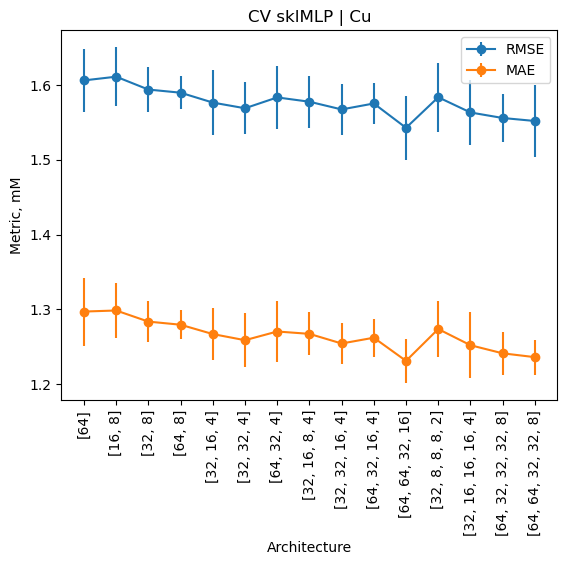

In [26]:
l_x_labels = [str(arch) for arch in l_mlp_HIDDEN_LAYER_SIZES]

plt.errorbar(l_x_labels, mlp_mean_rmse, 
             yerr=mlp_std_rmse, fmt='o-') # n_param_bf
plt.errorbar(l_x_labels, mlp_mean_mae, 
             yerr=mlp_std_mae, fmt='o-') # n_param_bf

#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Architecture') #'number of params'
plt.ylabel('Metric, mM')
plt.legend(['RMSE', 'MAE'])
plt.title(f'CV sklMLP | {PR_ION}')

plt.savefig('Output_data/Multi_Exper_deep_m_mlp_1.png')

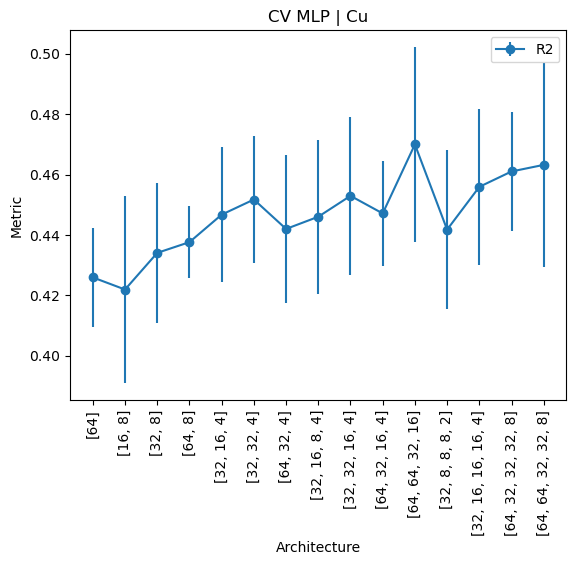

In [27]:
plt.errorbar(l_x_labels, mlp_mean_r2, 
             yerr=mlp_std_r2, fmt='o-') # n_param_bf

#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Architecture') #'number of params'
plt.ylabel('Metric')
plt.legend(['R2'])
plt.title(f'CV MLP | {PR_ION}')

plt.savefig('Output_data/Multi_Exper_deep_m_mlp_2.png')

In [28]:
dic = dict(mlp_mean_rmse = mlp_mean_rmse,
mlp_std_rmse = mlp_std_rmse,
mlp_mean_mae = mlp_mean_mae,
mlp_std_mae = mlp_std_mae,
mlp_mean_r2 = mlp_mean_r2,
mlp_std_r2 = mlp_std_r2,
)

df = pd.DataFrame(dic)
df.index = l_x_labels
df.index.name = 'architecture'
df

,mlp_mean_rmse,mlp_std_rmse,mlp_mean_mae,mlp_std_mae,mlp_mean_r2,mlp_std_r2
architecture,,,,,,
[64],1.606243,0.042151,1.296927,0.045438,0.425936,0.016315
"[16, 8]",1.611208,0.039671,1.298350,0.036376,0.421923,0.030973
"[32, 8]",1.594000,0.030640,1.283484,0.027493,0.434063,0.023075
"[64, 8]",1.589795,0.022137,1.279313,0.019455,0.437615,0.011955
"[32, 16, 4]",1.576576,0.042978,1.266808,0.034334,0.446717,0.022439
"[32, 32, 4]",1.568962,0.034906,1.258602,0.036220,0.451731,0.021032
"[64, 32, 4]",1.583479,0.042125,1.270239,0.040201,0.441987,0.024651
"[32, 16, 8, 4]",1.577719,0.034643,1.267092,0.028783,0.446026,0.025461
"[32, 32, 16, 4]",1.567403,0.033693,1.254190,0.027583,0.452948,0.026134


In [29]:
df.to_csv('Output_data/Multi_Exper_deep_mlp.csv')
df.to_excel('Output_data/Multi_Exper_deep_mlp.xlsx')

--------------------

## 8. Model - KAN


In [30]:
import torch
from kan import KAN

from tools import kfold_experiment_es

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


checkpoint directory created: ./model
saving model version 0.0
kfold: 0


description:   0%|                                                                                        | 0/200 [00:00<?, ?it/s]

trn_ls: 2.77e-01 | vl_ls: 2.80e-01 | e_stop: 20/20 | tst_ls: 2.80e-01 | reg: 8.23e+00 :  11%|▍   | 22/200 [00:25<03:25,  1.15s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.77e-01 | vl_ls: 2.79e-01 | e_stop: 20/20 | tst_ls: 2.79e-01 | reg: 8.06e+00 :  11%|▍   | 22/200 [00:25<03:26,  1.16s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.77e-01 | vl_ls: 2.76e-01 | e_stop: 20/20 | tst_ls: 2.76e-01 | reg: 8.10e+00 :  12%|▍   | 24/200 [00:26<03:12,  1.10s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.77e-01 | vl_ls: 2.79e-01 | e_stop: 20/20 | tst_ls: 2.79e-01 | reg: 8.00e+00 :  12%|▌   | 25/200 [00:27<03:09,  1.08s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.77e-01 | vl_ls: 2.83e-01 | e_stop: 20/20 | tst_ls: 2.83e-01 | reg: 8.08e+00 :  11%|▍   | 22/200 [00:23<03:14,  1.09s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.76e-01 | vl_ls: 2.93e-01 | e_stop: 20/20 | tst_ls: 2.93e-01 | reg: 8.23e+00 :  12%|▍   | 24/200 [00:26<03:15,  1.11s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.78e-01 | vl_ls: 2.69e-01 | e_stop: 20/20 | tst_ls: 2.69e-01 | reg: 8.18e+00 :  12%|▍   | 23/200 [00:25<03:19,  1.13s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.77e-01 | vl_ls: 2.82e-01 | e_stop: 20/20 | tst_ls: 2.82e-01 | reg: 7.88e+00 :  12%|▍   | 24/200 [00:28<03:26,  1.17s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.78e-01 | vl_ls: 2.73e-01 | e_stop: 20/20 | tst_ls: 2.73e-01 | reg: 7.95e+00 :  12%|▌   | 25/200 [00:29<03:27,  1.18s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.77e-01 | vl_ls: 2.76e-01 | e_stop: 20/20 | tst_ls: 2.76e-01 | reg: 8.14e+00 :  10%|▍   | 21/200 [00:26<03:43,  1.25s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.66e-01 | vl_ls: 2.57e-01 | e_stop: 20/20 | tst_ls: 2.57e-01 | reg: 1.78e+01 :  16%|▌   | 31/200 [01:14<06:48,  2.42s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.66e-01 | vl_ls: 2.98e-01 | e_stop: 20/20 | tst_ls: 2.98e-01 | reg: 2.43e+01 :  16%|▌   | 31/200 [01:14<06:48,  2.42s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.64e-01 | vl_ls: 2.71e-01 | e_stop: 20/20 | tst_ls: 2.71e-01 | reg: 2.01e+01 :  14%|▌   | 29/200 [01:08<06:46,  2.38s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.66e-01 | vl_ls: 2.69e-01 | e_stop: 20/20 | tst_ls: 2.69e-01 | reg: 1.56e+01 :  17%|▋   | 34/200 [01:21<06:39,  2.41s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.64e-01 | vl_ls: 2.76e-01 | e_stop: 20/20 | tst_ls: 2.76e-01 | reg: 2.03e+01 :  12%|▌   | 25/200 [01:00<07:01,  2.41s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.64e-01 | vl_ls: 2.76e-01 | e_stop: 20/20 | tst_ls: 2.76e-01 | reg: 1.79e+01 :  14%|▌   | 27/200 [01:02<06:42,  2.33s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.66e-01 | vl_ls: 2.75e-01 | e_stop: 20/20 | tst_ls: 2.75e-01 | reg: 1.72e+01 :  14%|▌   | 27/200 [01:02<06:42,  2.33s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.66e-01 | vl_ls: 2.55e-01 | e_stop: 20/20 | tst_ls: 2.55e-01 | reg: 1.85e+01 :  13%|▌   | 26/200 [01:04<07:12,  2.49s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.64e-01 | vl_ls: 2.81e-01 | e_stop: 20/20 | tst_ls: 2.81e-01 | reg: 1.80e+01 :  14%|▌   | 27/200 [01:15<08:05,  2.80s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.67e-01 | vl_ls: 2.70e-01 | e_stop: 20/20 | tst_ls: 2.70e-01 | reg: 1.86e+01 :  14%|▌   | 29/200 [01:09<06:48,  2.39s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.55e-01 | vl_ls: 2.63e-01 | e_stop: 20/20 | tst_ls: 2.63e-01 | reg: 3.50e+01 :  17%|▋   | 34/200 [02:25<11:49,  4.27s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.62e-01 | vl_ls: 2.56e-01 | e_stop: 20/20 | tst_ls: 2.56e-01 | reg: 3.22e+01 :  12%|▌   | 25/200 [01:56<13:33,  4.65s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.57e-01 | vl_ls: 2.61e-01 | e_stop: 20/20 | tst_ls: 2.61e-01 | reg: 3.22e+01 :  16%|▋   | 33/200 [02:24<12:12,  4.39s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.55e-01 | vl_ls: 2.77e-01 | e_stop: 20/20 | tst_ls: 2.77e-01 | reg: 2.99e+01 :  14%|▌   | 27/200 [01:52<12:00,  4.16s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.56e-01 | vl_ls: 2.57e-01 | e_stop: 20/20 | tst_ls: 2.57e-01 | reg: 3.76e+01 :  20%|▊   | 40/200 [02:55<11:42,  4.39s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.53e-01 | vl_ls: 2.68e-01 | e_stop: 20/20 | tst_ls: 2.68e-01 | reg: 3.24e+01 :  18%|▋   | 35/200 [02:32<11:56,  4.35s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.57e-01 | vl_ls: 2.62e-01 | e_stop: 20/20 | tst_ls: 2.62e-01 | reg: 3.16e+01 :  22%|▉   | 44/200 [03:20<11:49,  4.55s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.55e-01 | vl_ls: 2.56e-01 | e_stop: 20/20 | tst_ls: 2.56e-01 | reg: 3.43e+01 :  22%|▉   | 44/200 [03:12<11:21,  4.37s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.57e-01 | vl_ls: 2.66e-01 | e_stop: 20/20 | tst_ls: 2.66e-01 | reg: 3.04e+01 :  14%|▌   | 29/200 [02:10<12:48,  4.49s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.57e-01 | vl_ls: 2.67e-01 | e_stop: 20/20 | tst_ls: 2.67e-01 | reg: 3.47e+01 :  20%|▊   | 39/200 [02:55<12:05,  4.51s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.63e-01 | vl_ls: 2.63e-01 | e_stop: 20/20 | tst_ls: 2.63e-01 | reg: 3.26e+01 :  17%|▋   | 34/200 [01:59<09:45,  3.52s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.53e-01 | vl_ls: 2.62e-01 | e_stop: 20/20 | tst_ls: 2.62e-01 | reg: 3.84e+01 :  33%|█▎  | 66/200 [03:50<07:48,  3.49s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.56e-01 | vl_ls: 2.68e-01 | e_stop: 20/20 | tst_ls: 2.68e-01 | reg: 2.40e+01 :  18%|▋   | 35/200 [02:08<10:05,  3.67s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.58e-01 | vl_ls: 2.63e-01 | e_stop: 20/20 | tst_ls: 2.63e-01 | reg: 3.46e+01 :  18%|▋   | 37/200 [02:15<09:54,  3.65s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.56e-01 | vl_ls: 2.75e-01 | e_stop: 20/20 | tst_ls: 2.75e-01 | reg: 2.83e+01 :  14%|▌   | 29/200 [01:43<10:13,  3.59s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.58e-01 | vl_ls: 3.79e-01 | e_stop: 20/20 | tst_ls: 3.79e-01 | reg: 2.91e+01 :  16%|▌   | 31/200 [02:12<11:59,  4.26s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.54e-01 | vl_ls: 2.77e-01 | e_stop: 20/20 | tst_ls: 2.77e-01 | reg: 2.66e+01 :  14%|▌   | 27/200 [01:48<11:32,  4.00s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.60e-01 | vl_ls: 3.21e-01 | e_stop: 20/20 | tst_ls: 3.21e-01 | reg: 2.72e+01 :  12%|▍   | 23/200 [01:36<12:20,  4.19s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.62e-01 | vl_ls: 2.61e-01 | e_stop: 20/20 | tst_ls: 2.61e-01 | reg: 2.54e+01 :  14%|▌   | 29/200 [02:04<12:15,  4.30s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.58e-01 | vl_ls: 2.73e-01 | e_stop: 20/20 | tst_ls: 2.73e-01 | reg: 2.58e+01 :  14%|▌   | 29/200 [01:57<11:35,  4.07s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.45e-01 | vl_ls: 2.55e-01 | e_stop: 20/20 | tst_ls: 2.55e-01 | reg: 4.63e+01 :  22%|▉   | 45/200 [04:15<14:39,  5.68s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.52e-01 | vl_ls: 2.50e-01 | e_stop: 20/20 | tst_ls: 2.50e-01 | reg: 4.29e+01 :  15%|▌   | 30/200 [02:57<16:46,  5.92s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.50e-01 | vl_ls: 2.61e-01 | e_stop: 20/20 | tst_ls: 2.61e-01 | reg: 4.17e+01 :  16%|▋   | 33/200 [03:09<16:00,  5.75s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.45e-01 | vl_ls: 2.72e-01 | e_stop: 20/20 | tst_ls: 2.72e-01 | reg: 4.16e+01 :  20%|▊   | 40/200 [03:55<15:42,  5.89s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.49e-01 | vl_ls: 2.53e-01 | e_stop: 20/20 | tst_ls: 2.53e-01 | reg: 4.68e+01 :  24%|▉   | 47/200 [04:22<14:14,  5.58s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.46e-01 | vl_ls: 3.74e-01 | e_stop: 20/20 | tst_ls: 3.74e-01 | reg: 4.08e+01 :  16%|▋   | 32/200 [03:20<17:31,  6.26s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.49e-01 | vl_ls: 2.52e-01 | e_stop: 20/20 | tst_ls: 2.52e-01 | reg: 4.15e+01 :  20%|▊   | 39/200 [03:51<15:55,  5.94s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.47e-01 | vl_ls: 2.54e-01 | e_stop: 20/20 | tst_ls: 2.54e-01 | reg: 4.51e+01 :  20%|▊   | 39/200 [03:42<15:17,  5.70s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: nan | vl_ls: nan | e_stop: 0/20 | tst_ls: nan | reg: nan : 100%|████████████████████████| 200/200 [21:05<00:00,  6.33s/it]


checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.48e-01 | vl_ls: 2.59e-01 | e_stop: 20/20 | tst_ls: 2.59e-01 | reg: 4.26e+01 :  18%|▋   | 37/200 [04:04<17:56,  6.60s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.56e-01 | vl_ls: 2.63e-01 | e_stop: 20/20 | tst_ls: 2.63e-01 | reg: 3.56e+01 :  20%|▊   | 39/200 [03:59<16:28,  6.14s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.60e-01 | vl_ls: 2.70e-01 | e_stop: 20/20 | tst_ls: 2.70e-01 | reg: 3.75e+01 :  17%|▋   | 34/200 [03:34<17:29,  6.32s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.49e-01 | vl_ls: 2.69e-01 | e_stop: 20/20 | tst_ls: 2.69e-01 | reg: 3.85e+01 :  25%|█   | 50/200 [05:01<15:04,  6.03s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.47e-01 | vl_ls: 2.76e-01 | e_stop: 20/20 | tst_ls: 2.76e-01 | reg: 3.62e+01 :  22%|▉   | 44/200 [04:25<15:42,  6.04s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.53e-01 | vl_ls: 3.89e-01 | e_stop: 20/20 | tst_ls: 3.89e-01 | reg: 3.91e+01 :  18%|▋   | 37/200 [03:47<16:40,  6.14s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.55e-01 | vl_ls: 2.70e-01 | e_stop: 20/20 | tst_ls: 2.70e-01 | reg: 3.46e+01 :  15%|▌   | 30/200 [03:10<18:00,  6.35s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.54e-01 | vl_ls: 2.59e-01 | e_stop: 20/20 | tst_ls: 2.59e-01 | reg: 3.70e+01 :  18%|▋   | 37/200 [03:52<17:02,  6.27s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.54e-01 | vl_ls: 2.49e-01 | e_stop: 20/20 | tst_ls: 2.49e-01 | reg: 4.11e+01 :  22%|▊   | 43/200 [04:32<16:35,  6.34s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.52e-01 | vl_ls: 2.59e-01 | e_stop: 20/20 | tst_ls: 2.59e-01 | reg: 3.82e+01 :  17%|▋   | 34/200 [03:40<17:54,  6.48s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.58e-01 | vl_ls: 2.73e-01 | e_stop: 20/20 | tst_ls: 2.73e-01 | reg: 3.69e+01 :  14%|▌   | 29/200 [03:06<18:21,  6.44s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.62e-01 | vl_ls: 2.62e-01 | e_stop: 20/20 | tst_ls: 2.62e-01 | reg: 4.16e+01 :  14%|▌   | 29/200 [03:57<23:18,  8.18s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.47e-01 | vl_ls: 2.62e-01 | e_stop: 20/20 | tst_ls: 2.62e-01 | reg: 4.73e+01 :  24%|▉   | 49/200 [06:13<19:11,  7.63s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.48e-01 | vl_ls: 2.70e-01 | e_stop: 20/20 | tst_ls: 2.70e-01 | reg: 4.33e+01 :  25%|█   | 50/200 [06:27<19:21,  7.74s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.55e-01 | vl_ls: 2.80e-01 | e_stop: 20/20 | tst_ls: 2.80e-01 | reg: 4.10e+01 :  17%|▋   | 34/200 [04:26<21:41,  7.84s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.57e-01 | vl_ls: 2.71e-01 | e_stop: 20/20 | tst_ls: 2.71e-01 | reg: 4.28e+01 :  20%|▊   | 41/200 [05:22<20:51,  7.87s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.40e-01 | vl_ls: 2.67e-01 | e_stop: 20/20 | tst_ls: 2.67e-01 | reg: 4.34e+01 :  30%|█▏  | 60/200 [07:32<17:35,  7.54s/it]

Early stopping criteria raised


checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.48e-01 | vl_ls: 2.78e-01 | e_stop: 20/20 | tst_ls: 2.78e-01 | reg: 4.17e+01 :  15%|▌   | 30/200 [03:55<22:15,  7.85s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.50e-01 | vl_ls: 2.57e-01 | e_stop: 20/20 | tst_ls: 2.57e-01 | reg: 4.33e+01 :  28%|█▏  | 57/200 [07:17<18:16,  7.67s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.50e-01 | vl_ls: 2.66e-01 | e_stop: 20/20 | tst_ls: 2.66e-01 | reg: 4.37e+01 :  24%|▉   | 48/200 [06:00<19:01,  7.51s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.47e-01 | vl_ls: 2.69e-01 | e_stop: 20/20 | tst_ls: 2.69e-01 | reg: 4.01e+01 :  20%|▊   | 40/200 [04:56<19:46,  7.41s/it]


Early stopping criteria raised


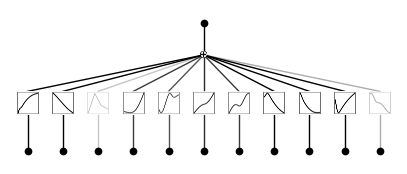

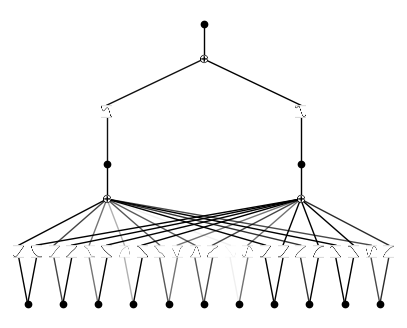

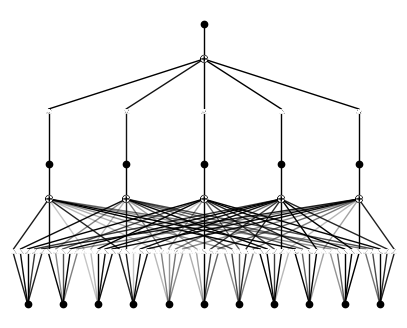

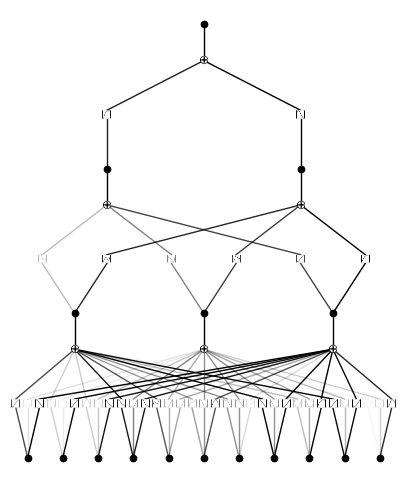

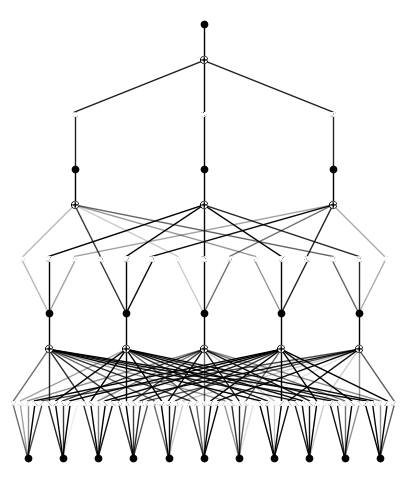

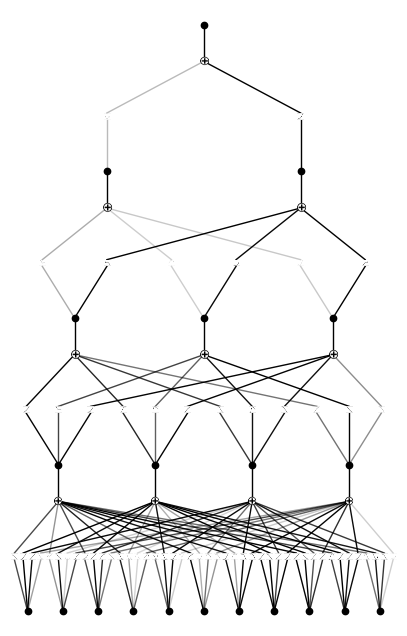

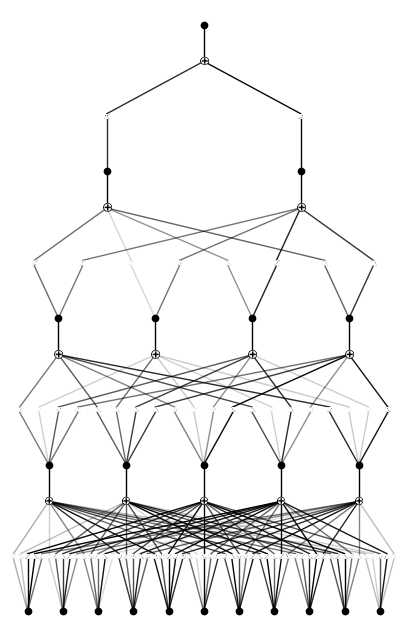

In [ ]:

PR_ION = 'Cu' #['Cu', 'Ni', 'Pb', 'Al', 'Co', 'Cr', 'NO3']
input_shape = x.shape[1]
l_kan_width = [[input_shape,1],
               [input_shape,2,1],
               [input_shape,5,1],
               [input_shape,3,2,1],
               [input_shape,5,3,1],
               [input_shape,4,3,2,1],
               [input_shape,5,4,2,1]]
l_kan_width_copy = l_kan_width.copy()


n_splits = 10


l_d_kan_params = [{'width':width, 'grid':3, 'k':3, 'device':device} for width in l_kan_width]
l_d_train_params = [{'tol': 1e-3, 'n_iter_no_change': 20,'opt': "LBFGS", 'steps': 200, 'lr': 1.0}] * len(l_kan_width)
l_x = [x] * len(l_kan_width)

# Choosing certain ion 
y = df_norm[[PR_ION]].to_numpy()
# Scaling y before train_test split in cv only because we aprior know the distribution of ions.
scaler_y = MinMaxScaler()
y_all_scaled = scaler_y.fit_transform(y)
l_y_scaler = [scaler_y] * len(l_kan_width)
l_y = [y_all_scaled] * len(l_kan_width)

l_x_scaler=[scaler_x]*len(l_kan_width)

kan_exper = kfold_experiment_es(l_x, l_y, l_d_kan_params, l_d_train_params, cv=n_splits, l_y_scaler=l_y_scaler, l_x_scaler=l_x_scaler)

In [33]:
kan_mean_rmse, kan_std_rmse = kan_exper[0][0], kan_exper[1][0]
kan_mean_mae, kan_std_mae = kan_exper[0][1], kan_exper[1][1]
kan_mean_r2, kan_std_r2 = kan_exper[0][2], kan_exper[1][2]

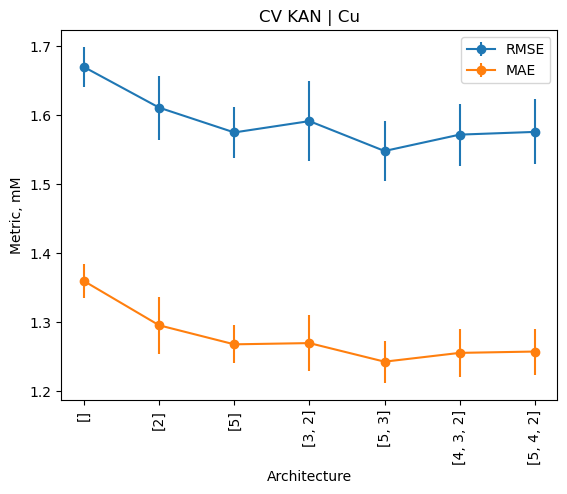

In [ ]:
l_x_labels = [str(arch[1:-1]) for arch in l_kan_width_copy]

plt.errorbar(l_x_labels, kan_mean_rmse, 
             yerr=kan_std_rmse, fmt='o-') # n_param_bf
plt.errorbar(l_x_labels, kan_mean_mae, 
             yerr=kan_std_mae, fmt='o-') # n_param_bf

#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Architecture') #'number of params'
plt.ylabel('Metric, mM')
plt.legend(['RMSE', 'MAE'])
plt.title(f'CV KAN | {PR_ION}')

plt.savefig('Output_data/Multi_Exper_deep_m_kan_1.png')

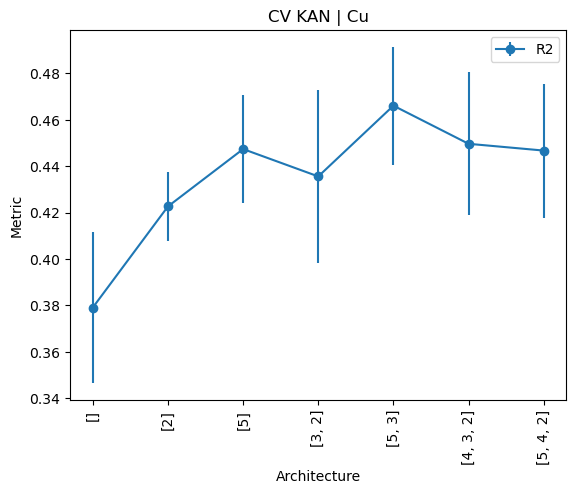

In [43]:
plt.errorbar(l_x_labels, kan_mean_r2, 
             yerr=kan_std_r2, fmt='o-') # n_param_bf

#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Architecture') #'number of params'
plt.ylabel('Metric')
plt.legend(['R2'])
plt.title(f'CV KAN | {PR_ION}')

plt.savefig('Output_data/Multi_Exper_deep_m_kan_2.png')

In [44]:
dic = dict(kan_mean_rmse = kan_mean_rmse,
kan_std_rmse = kan_std_rmse,
kan_mean_mae = kan_mean_mae,
kan_std_mae = kan_std_mae,
kan_mean_r2 = kan_mean_r2,
kan_std_r2 = kan_std_r2,
)

df = pd.DataFrame(dic)
df.index = l_x_labels
df.index.name = 'architecture'
df

,kan_mean_rmse,kan_std_rmse,kan_mean_mae,kan_std_mae,kan_mean_r2,kan_std_r2
architecture,,,,,,
[],1.669996,0.029267,1.359806,0.024671,0.379096,0.032451
[2],1.611121,0.046414,1.295706,0.041334,0.422670,0.014791
[5],1.575148,0.037404,1.268098,0.027447,0.447383,0.023109
"[3, 2]",1.591575,0.057477,1.269893,0.040600,0.435585,0.037411
"[5, 3]",1.548260,0.043777,1.242959,0.030603,0.466083,0.025377
"[4, 3, 2]",1.571992,0.044925,1.255710,0.034375,0.449650,0.030878
"[5, 4, 2]",1.575944,0.047003,1.257651,0.033346,0.446733,0.028877


In [45]:
df.to_csv('Multi_Exper_deep_kan.csv')
df.to_excel('Multi_Exper_deep_kan.xlsx')

grid = 10

checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.71e-01 | vl_ls: 2.67e-01 | e_stop: 20/20 | tst_ls: 2.67e-01 | reg: 9.08e+00 :  12%|▍   | 24/200 [00:36<04:28,  1.53s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.69e-01 | vl_ls: 8.23e+00 | e_stop: 20/20 | tst_ls: 8.23e+00 | reg: 9.05e+00 :  12%|▌   | 25/200 [00:33<03:57,  1.36s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.68e-01 | vl_ls: 2.88e-01 | e_stop: 20/20 | tst_ls: 2.88e-01 | reg: 8.93e+00 :  10%|▍   | 21/200 [00:28<04:01,  1.35s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.71e-01 | vl_ls: 2.71e-01 | e_stop: 20/20 | tst_ls: 2.71e-01 | reg: 8.94e+00 :  12%|▍   | 23/200 [00:30<03:56,  1.33s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.71e-01 | vl_ls: 2.67e-01 | e_stop: 20/20 | tst_ls: 2.67e-01 | reg: 9.21e+00 :  12%|▍   | 24/200 [00:31<03:52,  1.32s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.70e-01 | vl_ls: 2.75e-01 | e_stop: 20/20 | tst_ls: 2.75e-01 | reg: 8.98e+00 :  11%|▍   | 22/200 [00:30<04:05,  1.38s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.70e-01 | vl_ls: 2.72e-01 | e_stop: 20/20 | tst_ls: 2.72e-01 | reg: 9.17e+00 :  11%|▍   | 22/200 [00:30<04:02,  1.37s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.70e-01 | vl_ls: 2.74e-01 | e_stop: 20/20 | tst_ls: 2.74e-01 | reg: 9.06e+00 :  12%|▍   | 24/200 [00:32<04:00,  1.37s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.71e-01 | vl_ls: 2.68e-01 | e_stop: 20/20 | tst_ls: 2.68e-01 | reg: 8.99e+00 :  12%|▍   | 23/200 [00:33<04:15,  1.45s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.70e-01 | vl_ls: 2.73e-01 | e_stop: 20/20 | tst_ls: 2.73e-01 | reg: 8.96e+00 :  12%|▍   | 23/200 [00:32<04:07,  1.40s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.57e-01 | vl_ls: 2.67e-01 | e_stop: 20/20 | tst_ls: 2.67e-01 | reg: 2.12e+01 :  13%|▌   | 26/200 [01:06<07:26,  2.57s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.57e-01 | vl_ls: 2.76e-01 | e_stop: 20/20 | tst_ls: 2.76e-01 | reg: 1.89e+01 :  13%|▌   | 26/200 [01:04<07:14,  2.50s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.55e-01 | vl_ls: 2.76e-01 | e_stop: 20/20 | tst_ls: 2.76e-01 | reg: 1.75e+01 :  14%|▌   | 29/200 [01:12<07:04,  2.48s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.56e-01 | vl_ls: 2.76e-01 | e_stop: 20/20 | tst_ls: 2.76e-01 | reg: 1.65e+01 :  14%|▌   | 28/200 [01:08<07:01,  2.45s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.57e-01 | vl_ls: 2.62e-01 | e_stop: 20/20 | tst_ls: 2.62e-01 | reg: 1.91e+01 :  18%|▋   | 35/200 [01:36<07:34,  2.76s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.55e-01 | vl_ls: 2.71e-01 | e_stop: 20/20 | tst_ls: 2.71e-01 | reg: 1.68e+01 :  12%|▌   | 25/200 [01:28<10:16,  3.52s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.55e-01 | vl_ls: 3.03e+00 | e_stop: 20/20 | tst_ls: 3.03e+00 | reg: 1.99e+01 :  12%|▍   | 24/200 [01:02<07:40,  2.61s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.56e-01 | vl_ls: 2.71e-01 | e_stop: 20/20 | tst_ls: 2.71e-01 | reg: 1.78e+01 :  18%|▋   | 37/200 [01:34<06:55,  2.55s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.56e-01 | vl_ls: 2.82e-01 | e_stop: 20/20 | tst_ls: 2.82e-01 | reg: 1.98e+01 :  12%|▌   | 25/200 [01:02<07:20,  2.52s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.58e-01 | vl_ls: 2.89e-01 | e_stop: 20/20 | tst_ls: 2.89e-01 | reg: 2.93e+01 :  12%|▌   | 25/200 [01:02<07:15,  2.49s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.44e-01 | vl_ls: 2.87e-01 | e_stop: 20/20 | tst_ls: 2.87e-01 | reg: 2.59e+01 :  10%|▍   | 20/200 [01:21<12:12,  4.07s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.45e-01 | vl_ls: 2.74e-01 | e_stop: 20/20 | tst_ls: 2.74e-01 | reg: 2.51e+01 :  12%|▌   | 25/200 [01:41<11:51,  4.07s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.44e-01 | vl_ls: 3.80e+00 | e_stop: 20/20 | tst_ls: 3.80e+00 | reg: 2.91e+01 :  10%|▍   | 20/200 [01:21<12:10,  4.06s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.39e-01 | vl_ls: 2.98e-01 | e_stop: 20/20 | tst_ls: 2.98e-01 | reg: 3.15e+01 :  15%|▌   | 30/200 [01:59<11:14,  3.97s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.41e-01 | vl_ls: 2.78e-01 | e_stop: 20/20 | tst_ls: 2.78e-01 | reg: 2.63e+01 :  14%|▌   | 28/200 [02:25<14:53,  5.19s/it]

Early stopping criteria raised


checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.37e-01 | vl_ls: 2.76e-01 | e_stop: 20/20 | tst_ls: 2.76e-01 | reg: 2.92e+01 :  14%|▌   | 28/200 [02:31<15:33,  5.43s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.41e-01 | vl_ls: 2.98e-01 | e_stop: 20/20 | tst_ls: 2.98e-01 | reg: 2.55e+01 :  11%|▍   | 22/200 [02:04<16:49,  5.67s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.45e-01 | vl_ls: 2.75e-01 | e_stop: 20/20 | tst_ls: 2.75e-01 | reg: 2.74e+01 :  10%|▍   | 21/200 [01:59<16:55,  5.67s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.45e-01 | vl_ls: 2.92e-01 | e_stop: 20/20 | tst_ls: 2.92e-01 | reg: 2.78e+01 :  10%|▍   | 20/200 [01:50<16:36,  5.54s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.42e-01 | vl_ls: 2.72e-01 | e_stop: 20/20 | tst_ls: 2.72e-01 | reg: 2.44e+01 :  11%|▍   | 22/200 [02:04<16:45,  5.65s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.53e-01 | vl_ls: 2.88e-01 | e_stop: 20/20 | tst_ls: 2.88e-01 | reg: 2.16e+01 :  11%|▍   | 22/200 [01:56<15:46,  5.32s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.54e-01 | vl_ls: 2.88e-01 | e_stop: 20/20 | tst_ls: 2.88e-01 | reg: 2.19e+01 :  12%|▌   | 25/200 [02:13<15:32,  5.33s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.54e-01 | vl_ls: 2.89e-01 | e_stop: 20/20 | tst_ls: 2.89e-01 | reg: 2.25e+01 :  10%|▍   | 21/200 [01:52<15:58,  5.36s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.54e-01 | vl_ls: 2.82e-01 | e_stop: 20/20 | tst_ls: 2.82e-01 | reg: 2.31e+01 :  10%|▍   | 21/200 [01:52<15:55,  5.34s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.57e-01 | vl_ls: 2.85e-01 | e_stop: 20/20 | tst_ls: 2.85e-01 | reg: 2.25e+01 :  10%|▍   | 21/200 [01:50<15:46,  5.29s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.55e-01 | vl_ls: 2.80e-01 | e_stop: 20/20 | tst_ls: 2.80e-01 | reg: 2.20e+01 :  12%|▌   | 25/200 [02:11<15:20,  5.26s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.52e-01 | vl_ls: 2.88e-01 | e_stop: 20/20 | tst_ls: 2.88e-01 | reg: 2.34e+01 :  10%|▍   | 21/200 [01:51<15:53,  5.32s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.54e-01 | vl_ls: 2.87e-01 | e_stop: 20/20 | tst_ls: 2.87e-01 | reg: 2.23e+01 :  12%|▌   | 25/200 [02:09<15:08,  5.19s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.53e-01 | vl_ls: 3.02e-01 | e_stop: 20/20 | tst_ls: 3.02e-01 | reg: 2.22e+01 :  10%|▍   | 21/200 [01:48<15:28,  5.19s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.52e-01 | vl_ls: 2.88e-01 | e_stop: 20/20 | tst_ls: 2.88e-01 | reg: 2.30e+01 :  12%|▌   | 25/200 [02:10<15:14,  5.22s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.42e-01 | vl_ls: 3.12e-01 | e_stop: 20/20 | tst_ls: 3.12e-01 | reg: 3.22e+01 :  10%|▍   | 21/200 [02:29<21:16,  7.13s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.40e-01 | vl_ls: 2.88e-01 | e_stop: 20/20 | tst_ls: 2.88e-01 | reg: 3.37e+01 :  10%|▍   | 21/200 [02:29<21:18,  7.14s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.40e-01 | vl_ls: 2.99e-01 | e_stop: 20/20 | tst_ls: 2.99e-01 | reg: 3.15e+01 :  10%|▍   | 21/200 [02:31<21:29,  7.20s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.38e-01 | vl_ls: 4.50e-01 | e_stop: 20/20 | tst_ls: 4.50e-01 | reg: 3.14e+01 :  11%|▍   | 22/200 [02:38<21:25,  7.22s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.43e-01 | vl_ls: 2.89e-01 | e_stop: 20/20 | tst_ls: 2.89e-01 | reg: 3.29e+01 :  12%|▌   | 25/200 [02:58<20:49,  7.14s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.39e-01 | vl_ls: 3.05e-01 | e_stop: 20/20 | tst_ls: 3.05e-01 | reg: 3.32e+01 :  10%|▍   | 20/200 [02:22<21:26,  7.15s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.42e-01 | vl_ls: 3.26e-01 | e_stop: 20/20 | tst_ls: 3.26e-01 | reg: 3.20e+01 :  12%|▌   | 25/200 [02:56<20:36,  7.07s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.43e-01 | vl_ls: 2.84e-01 | e_stop: 20/20 | tst_ls: 2.84e-01 | reg: 3.39e+01 :  10%|▍   | 21/200 [02:26<20:45,  6.96s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.41e-01 | vl_ls: 2.99e-01 | e_stop: 20/20 | tst_ls: 2.99e-01 | reg: 3.20e+01 :  10%|▍   | 21/200 [02:30<21:24,  7.18s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.40e-01 | vl_ls: 2.88e-01 | e_stop: 20/20 | tst_ls: 2.88e-01 | reg: 3.13e+01 :  10%|▍   | 21/200 [02:27<20:58,  7.03s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.58e-01 | vl_ls: 2.83e-01 | e_stop: 20/20 | tst_ls: 2.83e-01 | reg: 3.20e+01 :  10%|▍   | 21/200 [02:36<22:11,  7.44s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.51e-01 | vl_ls: 2.95e-01 | e_stop: 20/20 | tst_ls: 2.95e-01 | reg: 3.22e+01 :  10%|▍   | 21/200 [02:38<22:34,  7.57s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.54e-01 | vl_ls: 2.93e-01 | e_stop: 20/20 | tst_ls: 2.93e-01 | reg: 3.22e+01 :  12%|▌   | 25/200 [03:07<21:51,  7.49s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.49e-01 | vl_ls: 2.83e-01 | e_stop: 20/20 | tst_ls: 2.83e-01 | reg: 3.33e+01 :  10%|▍   | 21/200 [02:38<22:29,  7.54s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.45e-01 | vl_ls: 3.03e-01 | e_stop: 20/20 | tst_ls: 3.03e-01 | reg: 3.23e+01 :  10%|▍   | 21/200 [02:33<21:50,  7.32s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.50e-01 | vl_ls: 3.04e-01 | e_stop: 20/20 | tst_ls: 3.04e-01 | reg: 3.24e+01 :  10%|▍   | 21/200 [02:35<22:05,  7.41s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.51e-01 | vl_ls: 3.02e-01 | e_stop: 20/20 | tst_ls: 3.02e-01 | reg: 3.19e+01 :  10%|▍   | 21/200 [02:35<22:04,  7.40s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.59e-01 | vl_ls: 2.75e-01 | e_stop: 20/20 | tst_ls: 2.75e-01 | reg: 3.23e+01 :  12%|▌   | 25/200 [03:01<21:08,  7.25s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.46e-01 | vl_ls: 3.16e-01 | e_stop: 20/20 | tst_ls: 3.16e-01 | reg: 3.25e+01 :  11%|▍   | 22/200 [02:44<22:08,  7.46s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.50e-01 | vl_ls: 2.92e-01 | e_stop: 20/20 | tst_ls: 2.92e-01 | reg: 3.22e+01 :  12%|▌   | 25/200 [03:03<21:24,  7.34s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 2.35e-01 | vl_ls: 2.97e-01 | e_stop: 20/20 | tst_ls: 2.97e-01 | reg: 3.78e+01 :  12%|▌   | 25/200 [03:31<24:41,  8.47s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 2.34e-01 | vl_ls: 3.02e-01 | e_stop: 20/20 | tst_ls: 3.02e-01 | reg: 3.72e+01 :  12%|▍   | 24/200 [03:34<26:14,  8.95s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 2.58e-01 | vl_ls: 4.55e-01 | e_stop: 20/20 | tst_ls: 4.55e-01 | reg: 3.88e+01 :  18%|▋   | 35/200 [04:58<23:28,  8.53s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 2.47e-01 | vl_ls: 3.05e-01 | e_stop: 20/20 | tst_ls: 3.05e-01 | reg: 3.65e+01 :  12%|▌   | 25/200 [03:39<25:39,  8.80s/it]

Early stopping criteria raised


checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 2.43e-01 | vl_ls: 2.96e-01 | e_stop: 20/20 | tst_ls: 2.96e-01 | reg: 3.81e+01 :  12%|▌   | 25/200 [03:30<24:32,  8.42s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 2.36e-01 | vl_ls: 3.07e-01 | e_stop: 20/20 | tst_ls: 3.07e-01 | reg: 3.82e+01 :  12%|▍   | 23/200 [03:10<24:27,  8.29s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 2.36e-01 | vl_ls: 3.21e-01 | e_stop: 20/20 | tst_ls: 3.21e-01 | reg: 3.78e+01 :  11%|▍   | 22/200 [03:10<25:40,  8.65s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 2.35e-01 | vl_ls: 3.08e-01 | e_stop: 20/20 | tst_ls: 3.08e-01 | reg: 3.83e+01 :  11%|▍   | 22/200 [03:05<25:04,  8.45s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 2.49e-01 | vl_ls: 3.04e-01 | e_stop: 20/20 | tst_ls: 3.04e-01 | reg: 3.80e+01 :  12%|▌   | 25/200 [03:50<26:56,  9.24s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 2.39e-01 | vl_ls: 2.92e-01 | e_stop: 20/20 | tst_ls: 2.92e-01 | reg: 3.77e+01 :  12%|▌   | 25/200 [03:29<24:26,  8.38s/it]


Early stopping criteria raised


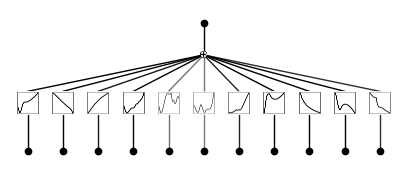

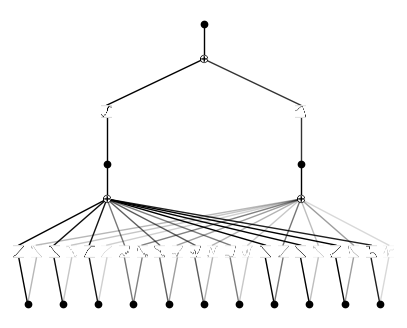

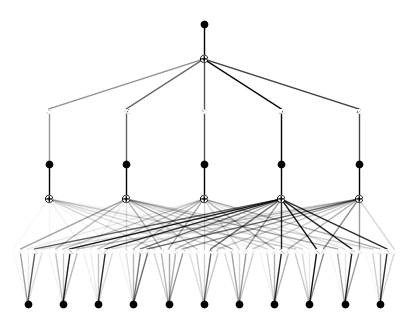

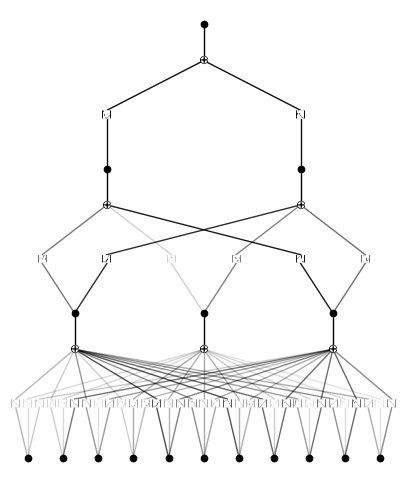

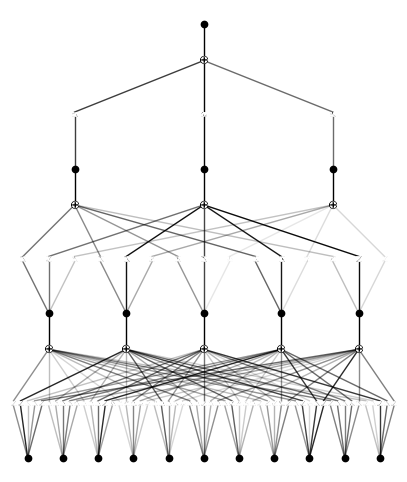

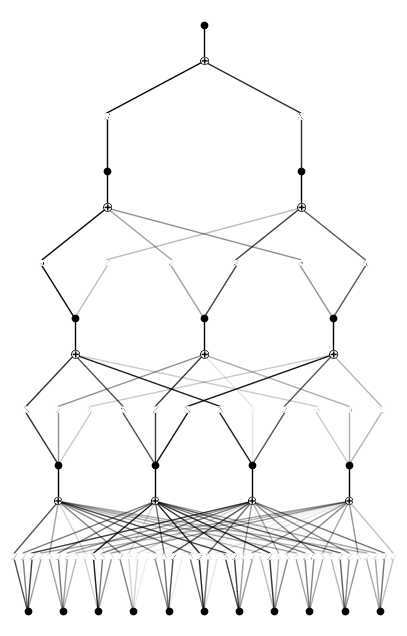

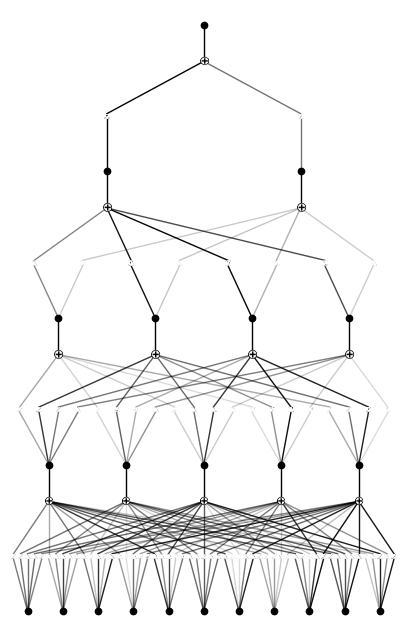

In [ ]:
PR_ION = 'Cu' #['Cu', 'Ni', 'Pb', 'Al', 'Co', 'Cr', 'NO3']
input_shape = x.shape[1]
l_kan_width = [[input_shape,1],
               [input_shape,2,1],
               [input_shape,5,1],
               [input_shape,3,2,1],
               [input_shape,5,3,1],
               [input_shape,4,3,2,1],
               [input_shape,5,4,2,1]] # [input_shape,7,6,5,4,3,1]
l_kan_width_copy = l_kan_width.copy()


n_splits = 10


l_d_kan_params = [{'width':width, 'grid':8, 'k':3, 'device':device} for width in l_kan_width]
l_d_train_params = [{'tol': 1e-3, 'n_iter_no_change': 20,'opt': "LBFGS", 'steps': 200, 'lr': 1.0}] * len(l_kan_width)
l_x = [x] * len(l_kan_width)

# Choosing certain ion 
y = df_norm[[PR_ION]].to_numpy()
# Scaling y before train_test split in cv only because we aprior know the distribution of ions.
scaler_y = MinMaxScaler()
y_all_scaled = scaler_y.fit_transform(y)
l_y_scaler = [scaler_y] * len(l_kan_width)
l_y = [y_all_scaled] * len(l_kan_width)

l_x_scaler=[scaler_x]*len(l_kan_width)

kan_exper = kfold_experiment_es(l_x, l_y, l_d_kan_params, l_d_train_params, cv=n_splits, l_y_scaler=l_y_scaler, l_x_scaler=l_x_scaler)

In [62]:
len(l_x), len(l_y), len(l_d_kan_params), len(l_d_train_params), len(l_y_scaler), len(l_x_scaler)

(8, 8, 8, 8, 8, 7)

In [48]:
kan_mean_rmse, kan_std_rmse = kan_exper[0][0], kan_exper[1][0]
kan_mean_mae, kan_std_mae = kan_exper[0][1], kan_exper[1][1]
kan_mean_r2, kan_std_r2 = kan_exper[0][2], kan_exper[1][2]

In [60]:
kan_mean_rmse.shape

(7,)

In [ ]:
l_kan_width_copy = [[input_shape,1],
               [input_shape,2,1],
               [input_shape,5,1],
               [input_shape,3,2,1],
               [input_shape,5,3,1],
               [input_shape,4,3,2,1]] # [input_shape,5,4,2,1]

In [64]:
kan_mean_rmse

array([1.92855409, 1.71962812, 1.64360681, 1.65842378, 1.66861892,
       1.68608043, 1.67927416])

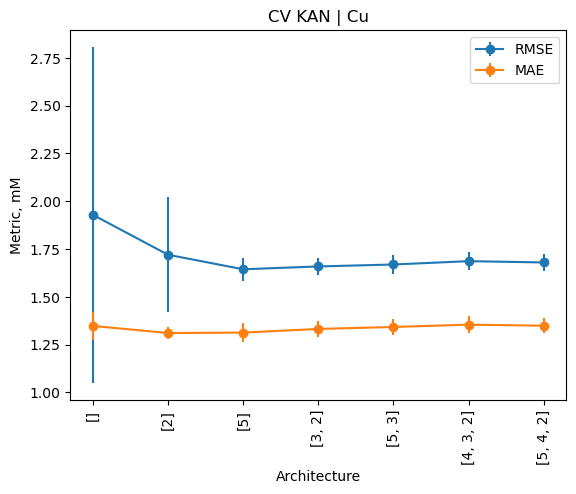

In [65]:
l_x_labels = [str(arch[1:-1]) for arch in l_kan_width_copy]

plt.errorbar(l_x_labels, kan_mean_rmse, 
             yerr=kan_std_rmse, fmt='o-') # n_param_bf
plt.errorbar(l_x_labels, kan_mean_mae, 
             yerr=kan_std_mae, fmt='o-') # n_param_bf

#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Architecture') #'number of params'
plt.ylabel('Metric, mM')
plt.legend(['RMSE', 'MAE'])
plt.title(f'CV KAN | {PR_ION}')

plt.savefig('Output_data/Multi_Exper_deep_m_kan_g_8_1.png')

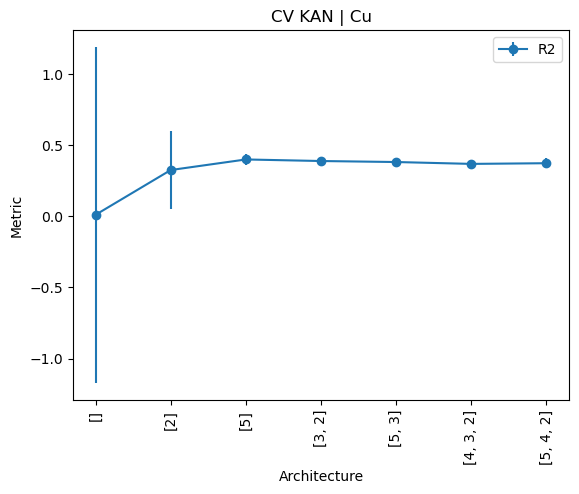

In [66]:
plt.errorbar(l_x_labels, kan_mean_r2, 
             yerr=kan_std_r2, fmt='o-') # n_param_bf

#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Architecture') #'number of params'
plt.ylabel('Metric')
plt.legend(['R2'])
plt.title(f'CV KAN | {PR_ION}')

plt.savefig('Output_data/Multi_Exper_deep_m_kan_g_8_2.png')

In [67]:
dic = dict(kan_mean_rmse = kan_mean_rmse,
kan_std_rmse = kan_std_rmse,
kan_mean_mae = kan_mean_mae,
kan_std_mae = kan_std_mae,
kan_mean_r2 = kan_mean_r2,
kan_std_r2 = kan_std_r2,
)

df = pd.DataFrame(dic)
df.index = l_x_labels
df.index.name = 'architecture'
df

,kan_mean_rmse,kan_std_rmse,kan_mean_mae,kan_std_mae,kan_mean_r2,kan_std_r2
architecture,,,,,,
[],1.928554,0.878645,1.347287,0.074059,0.009732,1.180342
[2],1.719628,0.301449,1.310319,0.033195,0.324252,0.271545
[5],1.643607,0.060068,1.312411,0.050518,0.398531,0.040139
"[3, 2]",1.658424,0.045328,1.331538,0.042351,0.387561,0.028682
"[5, 3]",1.668619,0.047426,1.341839,0.043647,0.380458,0.028953
"[4, 3, 2]",1.686080,0.048253,1.354028,0.044190,0.367370,0.025660
"[5, 4, 2]",1.679274,0.045008,1.348439,0.037979,0.372130,0.035763


In [68]:
df.to_csv('Multi_Exper_deep_kan_g_8.csv')
df.to_excel('Multi_Exper_deep_kan_g_8.xlsx')